C:\Users\Naresh\AppData\Local\Temp\ipykernel_25532\4240697667.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=df, palette='Set2')


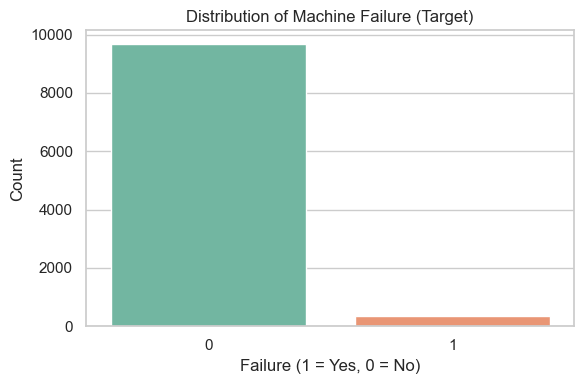

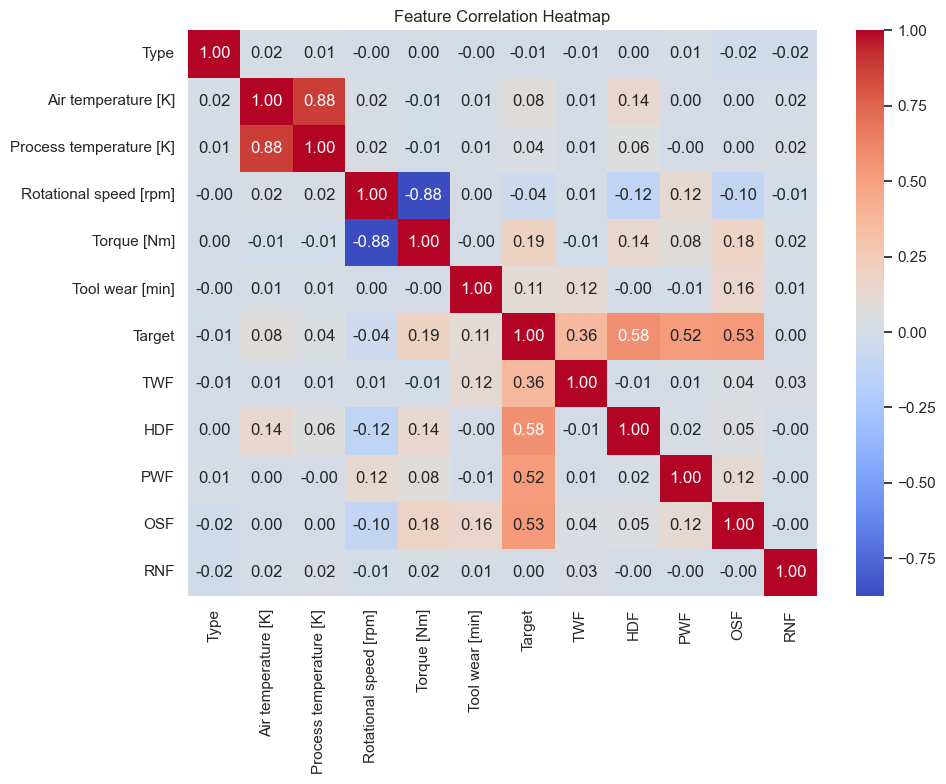

C:\Users\Naresh\AppData\Local\Temp\ipykernel_25532\4240697667.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=col, data=df, palette='Set3')


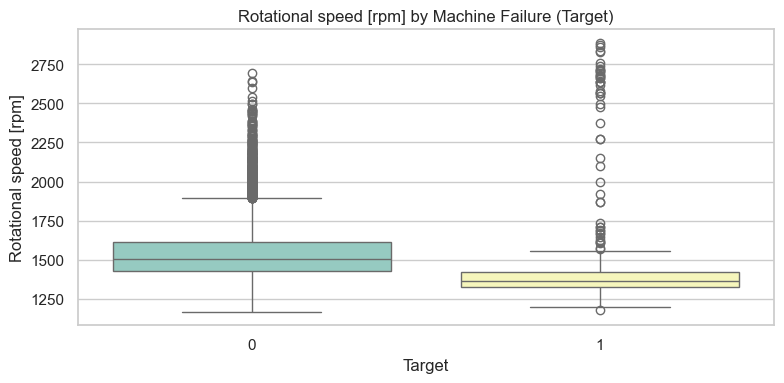

C:\Users\Naresh\AppData\Local\Temp\ipykernel_25532\4240697667.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=col, data=df, palette='Set3')


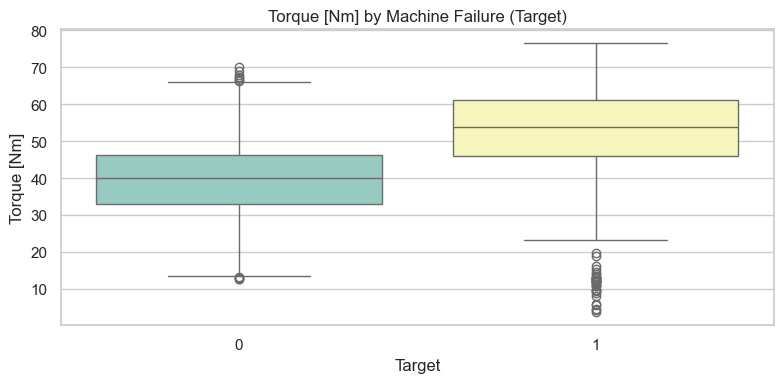

C:\Users\Naresh\AppData\Local\Temp\ipykernel_25532\4240697667.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=col, data=df, palette='Set3')


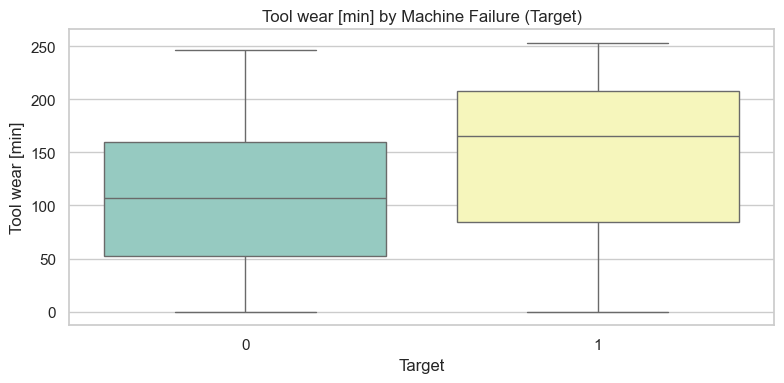

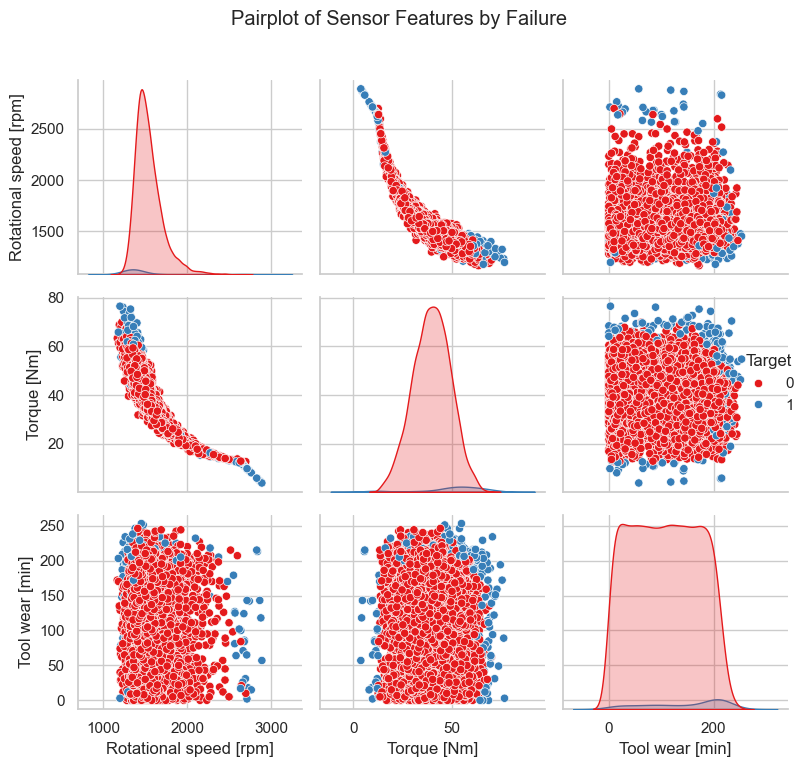

Training a Random Forest model...

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000



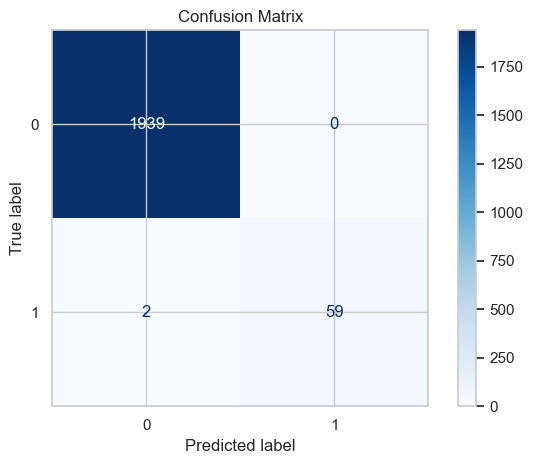

C:\Users\Naresh\AppData\Local\Temp\ipykernel_25532\4240697667.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")


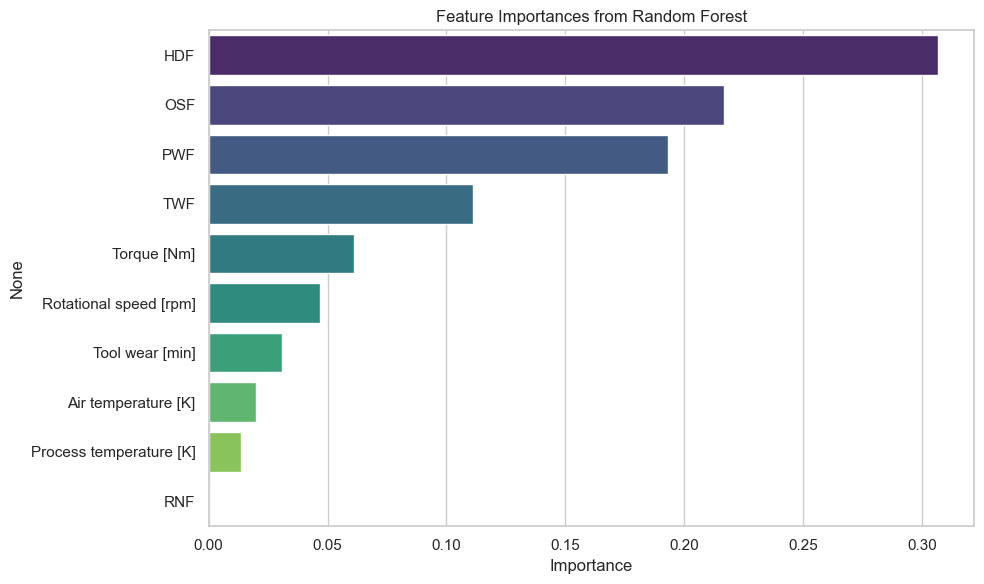

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Set plot styles
sns.set(style="whitegrid")

# Load dataset
data_path = r'C:\Users\Naresh\OneDrive\Desktop\Rooman\ai4i2020_cleaned.csv'
df = pd.read_csv(data_path)

# Rename 'Machine failure' to 'Target' for clarity
df = df.rename(columns={"Machine failure": "Target"})

# Visual 1: Count of failures
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=df, palette='Set2')
plt.title('Distribution of Machine Failure (Target)')
plt.xlabel('Failure (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Visual 2: Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# Visual 3: Boxplots of selected sensor data
sensor_cols = ['Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
for col in sensor_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Target', y=col, data=df, palette='Set3')
    plt.title(f'{col} by Machine Failure (Target)')
    plt.tight_layout()
    plt.show()

# Visual 4: Pairplot of important features
pairplot_df = df[['Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']]
sns.pairplot(pairplot_df, hue='Target', diag_kind='kde', palette='Set1')
plt.suptitle('Pairplot of Sensor Features by Failure', y=1.02)
plt.tight_layout()
plt.show()

# MODEL TRAINING SECTION
print("Training a Random Forest model...")

# Prepare features and target
X = df.drop(columns=['Target', 'Type'])  # Drop non-numeric and target columns
y = df['Target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()
